## Desafio - Regresión desde la econometría
- Karen Cortes
- Constanza Córdova

#### Variables del dataframe
- Income : Ingreso anual disponible en miles de dólares.
- Limit : Límite del crédito.
- Rating : Ranking del crédito.
- Cards : Cantidad de tarjetas de credito.
- Age : Edad del usuario.
- Education : Años de educación del usuario.
- Gender : ¿Hombre o mujer?
- Student : ¿Es estudiante?
- Married : ¿Está casado?
- Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
- Balance : Promedio de deuda en tarjeta de crédito de usuario.

### Desafío 1: Prepare el ambiente de trabajo
- Importe las librerías básica para el análisis de datos
- Incluya los import base de statsmodels
- Importe la base de datos Credit.csv y elimine columna Unnamed: 0 
- Siguiendo las buenas practicas, genere variables binarias para capturar el efecto del grupo minoritario de cada variables. Para el caso de Ethnicity, genere binarias para African American y Asian.

Importamos las librerías básicas incluyendo las librerias para statsmodels

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
import statsmodels.formula.api as snf

Importamos la base de dato y eliminamos columna Unnamed

In [2]:
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis =1)
df.sample()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
18,49.57,6384,448,1,28,9,Female,No,Yes,Asian,891


In [3]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

Generamos variables binarias para Etnicidad

In [4]:
tmp = df['Ethnicity'].unique()

for et in list(tmp):
    df[et] = np.where(df['Ethnicity']== et, 1, 0)

In [5]:
df.sample(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Caucasian,Asian,African American
242,20.918,1233,128,3,47,18,Female,Yes,Yes,Asian,16,0,1,0
335,24.314,3409,270,2,23,7,Female,No,Yes,Caucasian,194,1,0,0
89,59.530,7518,543,3,52,9,Female,No,No,African American,1176,0,0,1
294,42.915,2532,205,4,42,13,Male,No,Yes,Asian,0,0,1,0
58,10.354,3480,281,2,70,17,Male,No,Yes,Caucasian,333,1,0,0


### Desafío 2: Genere gráficos descriptivos para las variables contínuas 
- Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?


In [6]:
def plot_hist(df, x):
    tmp = df.copy()
    tmp = tmp[x].dropna()
    sns.distplot(tmp, bins=10, kde=False, hist_kws={"alpha": 0.6, "color": "grey"}, label = x).set_title(f"Observaciones de {x}")
    plt.axvline(np.mean(tmp), color='r', ls="dotted", label = f'media: {round(np.mean(tmp),2)}')
    plt.axvline(np.median(tmp), color='b', ls="dotted", label = f'mediana: {round(np.median(tmp),2)}')
    plt.legend()


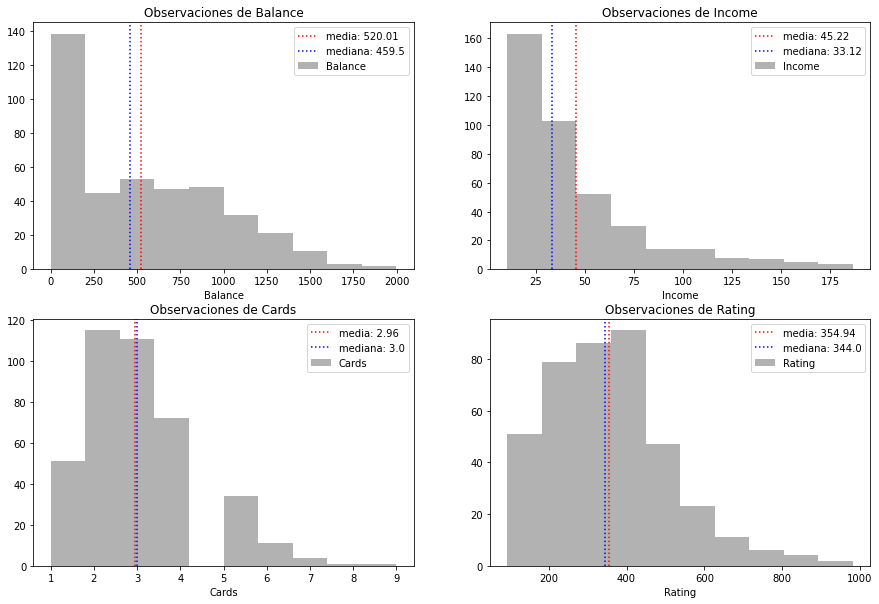

In [7]:
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
plot_hist(df, 'Balance')
plt.subplot(2, 2, 2)
plot_hist(df, 'Income')
plt.subplot(2, 2, 3)
plot_hist(df, 'Cards')
plt.subplot(2, 2, 4)
plot_hist(df, 'Rating')

- respecto a Balance se observa que la media de deuda está por sobre la mediana de la muestra, la mitad de la muestra tiene un promedio de deuda inferior a 459,5 
- respecto a Income (Ingreso anual en miles de dólares), se observa que la muestra tiene un sesgo positivo, la mitad de la muestra posee un ingreso anual inferior a 33.12 miles de dólares 
- Respecto a cards (Tarjetas de credito), se observa que la media se aproxima a la mediana 
- Respecto a Rating (Ranking del crédito), se observa que la media es levemente mayor que la mediana por lo que ambos estadisticos son representativos de la muestra 

### Desafio 3: Regresión Lineal Simple

In [8]:
modelo = snf.ols('Balance ~ Student', df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.49e-07
Time:                        23:17:39   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#La intercerpción corresponde al grupo estudiantes = No
no_student = 480.3694
#El coeficiente de student[T. Yes] representa la diferencia que existe en el promedio de deuda entre un no estudiante y estudiante
diff = 396.4556
#El promedio de deuda de los estudiantes es la suma de la intercepción con la diferencia 
student = no_student + diff
student

876.825

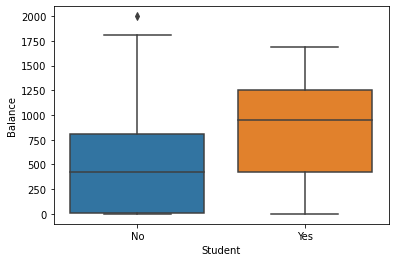

In [10]:
#Adicional al analisis ols, graficamos un boxplot para ver la diferencia entre grupos
sns.boxplot(x=df['Student'], y=df['Balance']);

In [11]:
modelo_2 = snf.ols('Balance ~ Income', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.03e-22
Time:                        23:17:44   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

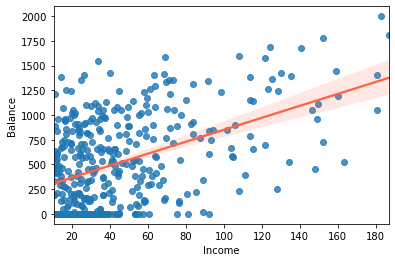

In [12]:
sns.regplot(df['Income'], df['Balance'], order = 1, line_kws = {'color': 'tomato'} )

In [13]:
modelo_3 = snf.ols('Balance ~ Rating', df).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          1.90e-120
Time:                        23:17:45   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

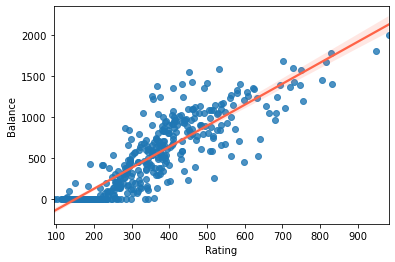

In [14]:
sns.regplot(df['Rating'], df['Balance'], order = 1, line_kws = {'color': 'tomato'} )

#### ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
- Luego de analizar las tres variables se determina que, la variable con mayor poder explicativo es Rating con R-squared: 0.746. Lo anterior se reafirma con el gráfico de dispersión de la variable Rating vs Balance

##### ¿Qué podemos decir sobre el comportamiento de Student ?
- el ser estudiante explica en un 6.7% la variabilidad en el Balance de la muestra

##### ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?
#### Prueba de Hipótesis
#### Hipótesis nula: El valor de balance de los No estudiantes es igual al balance de estudiantes

#### ($H_{o}: {p}_{\textsf{1}} = {p}_{\textsf{2}}$).

#### Hipótesis alternativa: Existe una diferencia substancial entre ambos balance

#### ($H_{a}: {p}_{\textsf{1}} \neq {p}_{\textsf{2}}$).

In [15]:
df_student = df[df['Student'] == 'Yes']['Balance'].dropna()
df_notstudent = df[df['Student'] == 'No']['Balance'].dropna()


In [16]:
def prueba_hipotesis(variable_1, variable_0):
    
    t, pval = stats.ttest_ind(variable_1, variable_0, equal_var = True)

    media_1 = np.mean(variable_1)
    media_0 = np.mean(variable_0)

    diferencia = media_1 - media_0
    
    print('t: ',t)
    print('p-val: ', pval)
    print('media_1: ', media_1)
    print('media_0: ', media_0)
    print('diferencia medias: ', diferencia)
    print('\n \t ********')
    
prueba_hipotesis(df_student, df_notstudent)

t:  5.349964123075003
p-val:  1.4877341077323024e-07
media_1:  876.825
media_0:  480.36944444444447
diferencia medias:  396.4555555555556

 	 ********


- De acuerdo a la prueba de hipótesis realizada con las muestras independientes se rechaza la hipótesis nula dado que la probabilidad de ocurrencia P-val tiende a cero

## Desafío 4: Genere un modelo que incluya todos los regresores

Antes de evaluar multiples variables es conveniente estandarizar las variables para trabajar con valores adimensionales

In [17]:
df_standarizado = df.copy()
for i in ['Income','Limit','Rating', 'Cards', 'Age', 'Education', 'Balance']:
    df_standarizado[i] = (df_standarizado[i]-np.mean(df_standarizado[i]))/np.std(df_standarizado[i])
df_standarizado['AfriAmeri'] = df_standarizado['African American']
df_standarizado

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Caucasian,Asian,African American,AfriAmeri
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,Male,No,Yes,Caucasian,-0.407277,1,0,0,0
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,Female,Yes,Yes,Asian,0.834056,0,1,0,0
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,Male,No,No,Asian,0.130634,0,1,0,0
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,Female,No,No,Asian,0.966900,0,1,0,0
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,Male,No,Yes,Caucasian,-0.411633,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,Male,No,Yes,Caucasian,0.087078,1,0,0,0
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,Male,No,No,African American,-0.087144,0,0,1,1
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,Female,No,Yes,Caucasian,-0.831944,1,0,0,0
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,Male,No,Yes,Caucasian,-1.132477,1,0,0,0


Generamos el modelo con todas las variables estandarizadas:

In [18]:
modelo_regresores = snf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Caucasian + Asian + AfriAmeri',
                            df_standarizado).fit()
modelo_regresores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          1.11e-253
Time:                        23:17:53   Log-Likelihood:                 53.095
No. Observations:                 400   AIC:                            -82.19
Df Residuals:                     388   BIC:                            -34.29
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0526      0.016     -3.272      0.001      -0.084      -0.021
Gender[T.Female]    -0.0232      0.022     -1.075      0.283      -0.066       0.019
Student[T.Yes]       0.9272      0.036     25.459      0.000       0.856       0.999
Married[T.Yes]      -0.0186      0.023     -0.824      0.411      -0.063       0.026
Income              -0.5982      0.018    -33.314      0.000      -0.633      -0.563
Limit                0.9584      0.165      5.824      0.000       0.635       1.282
Rating               0.3825      0.165      2.315      0.021       0.058       0.707
Cards                0.0529      0.013      4.083      0.000       0.027       0.078
Age                 -0.0230      0.011     -2.088      0.037      -0.045      -0.001
Education           -0.0075      0.011     -0.688      0.492      -0.029       0.014
Caucasian           -0.0150      0.014     -1.041      0.299      -0.043       0.013
Asian               -0.0005      0.019     -0.025      0.980      -0.037       0.036
AfriAmeri           -0.0371      0.018     -2.082      0.038      -0.072      -0.002
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     5.83e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Se observa que el modelo considerando todos los regresores explica el 95.5% de la variabilidad de los datos 

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo
- En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-val < 0.25. Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.
- ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [19]:
modelo_regresores_2 = snf.ols('Balance ~ Income + Limit + Rating + Cards + Student ',
                            df_standarizado).fit()
modelo_regresores_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          3.60e-261
Time:                        23:17:55   Log-Likelihood:                 48.947
No. Observations:                 400   AIC:                            -85.89
Df Residuals:                     394   BIC:                            -61.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0930      0.011     -8.173      0.000      -0.115      -0.071
Student[T.Yes]     0.9296      0.036     25.754      0.000       0.859       1.001
Income            -0.6037      0.018    -34.024      0.000      -0.639      -0.569
Limit              0.9760      0.163      5.977      0.000       0.655       1.297
Rating             0.3661      0.164      2.234      0.026       0.044       0.688
Cards              0.0532      0.013      4.118      0.000       0.028       0.079
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El nuevo modelo explica el 95.4% de la variabilidad de los datos. Respecto al modelo anterior  hay una diferencia de 0.1%. Desde un punto de vista de R2 el modelo 1 es mejor, sin embargo, la diferencia se puede considerar despreciable. La ventaja del modelo ajustado es que con 5 variables se explica de manera similar la variabilidad de los datos.

## Desafío 6
Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

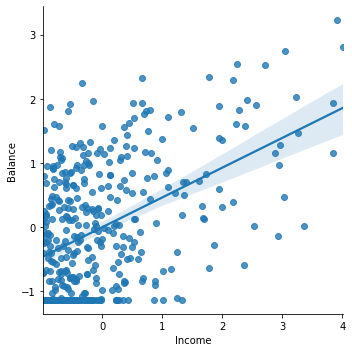

In [20]:
sns.lmplot(x='Income',y='Balance', data=df_standarizado)

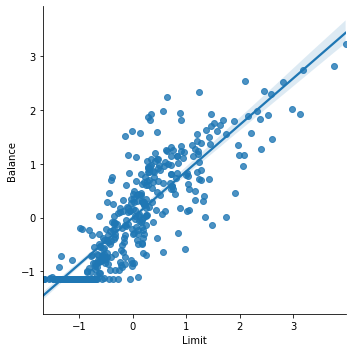

In [21]:
sns.lmplot(x='Limit',y='Balance', data=df_standarizado)

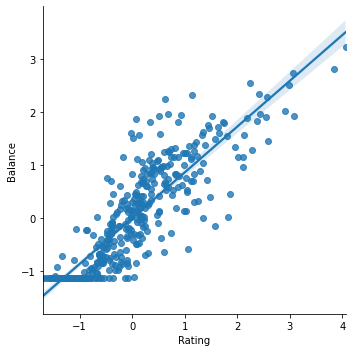

In [22]:
sns.lmplot(x='Rating',y='Balance', data=df_standarizado)

- Para las tres variables principales se observa que Limit y Rating son las que tienen menos variabilidad respecto a Income